# Parte 1 - Implementação do algoritmo de agrupamentos *Knn*

A primeira atividade dessa lista consiste em implementar o algoritmo *Knn*. Se trata de um algoritmo de aprendizado supervisionado comumente utilizado para classificar amostras com base nos rótulos dos K vizinhos mais próximos. 

Ao se utilizar o algorimo *Knn* para classificação normalmente os seguintes passos são seguidos:

 1. Escolhe-se o número de K vizinhos.
 2. Carrega-se os dados de "treinamento". 
 3. Para cada amostra nesse dataset:
    - Calcula-se a distância entre essa amostra e as outras presentes no dataset de treinamento. *Aqui, pode-se utilizar diferentes métricas de distância. Uma comumente utilizada é a distância euclidiana.*
    - Adiciona-se a distância e o índice da amostra a uma coleção.
 4. Ordena-se os índices da tal coleção citada no sub-item anterior em ordem crescente de distâncias.
 5. Separa-se K amostras dos primeiros K índices da ordenação anterior. 
 6. Captura-se os rótulos dessas amostras e retorna-se aquele que for mais comum.
 
Uma implementação desse algoritmo descrito acima foi desenvolvida, como pode ser visto abaixo. 

In [1]:
import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def manhattan_distance(x1, x2):
    return np.sum(abs(x1 - x2))
    
class Knn:

    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X # X can have any features - matrix
        self.y_train = y # y is a vector

    def predict(self, X, distance_type):
        y_hat = [self._predict(x, distance_type) for x in X]
        return np.array(y_hat)

    def _predict(self, x, distance_type):
        # Calculate distances between x and all samples in X_train
        if distance_type == 'euclidean':
            distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        elif distance_type == 'manhattan':
            distances = [manhattan_distance(x, x_train) for x_train in self.X_train]
        else:
            print("ERROR: invalid distance type.")
        # Sort by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[:self.k]
        # Get the labels of the k nearest neighbors
        k_neighbor_labels = [self.y_train[i] for i in k_idx]  
        # Pick the most commom label
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

# Parte 2 - Aplicação do método desenvolvido

Uma vez implementado o *Knn*, buscou-se observar e entender o comportamento do mesmo. Para isso criou-se um conjunto de dados com quatro distribuições Gaussianas bidimensionais e utilizou-se o algoritmo *Knn* para diferentes valores de K. Em seguida, variou-se também a sobreposição das distribuições (variando o desvio padrão) e novamente utilizou-se o algoritmo *Knn* para diferentes valores de K. Foi criado um conjunto aleatório de 20 amostras  para serem classificadas. O algoritmo desenvolvido, bem como os resultados podem ser vistos abaixo.

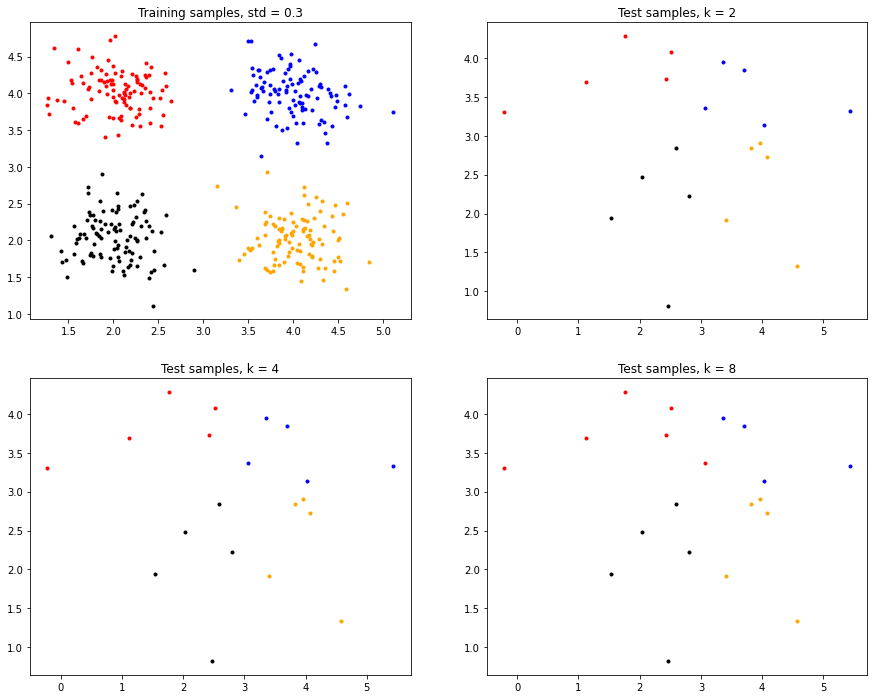

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

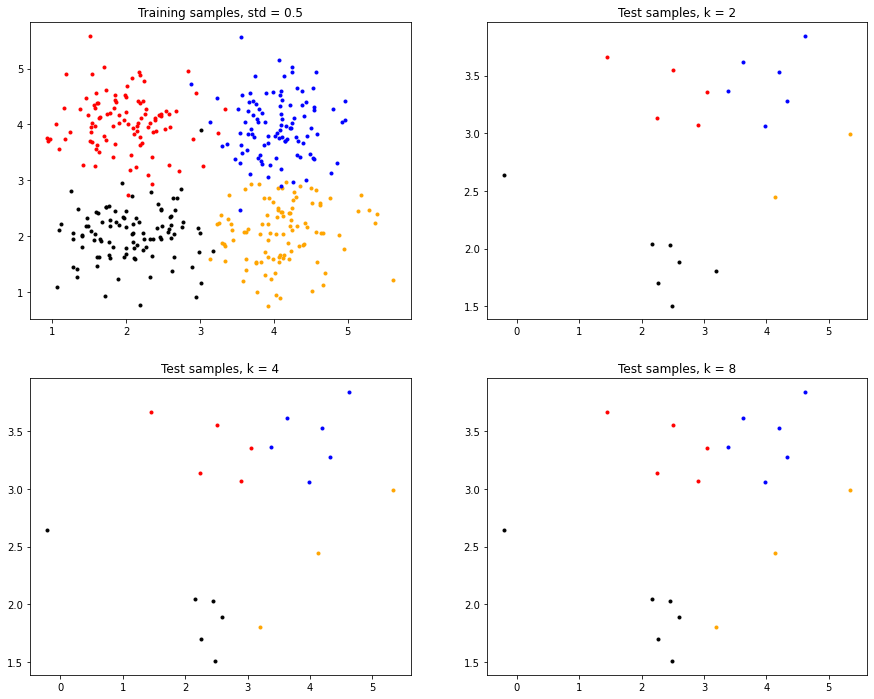

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

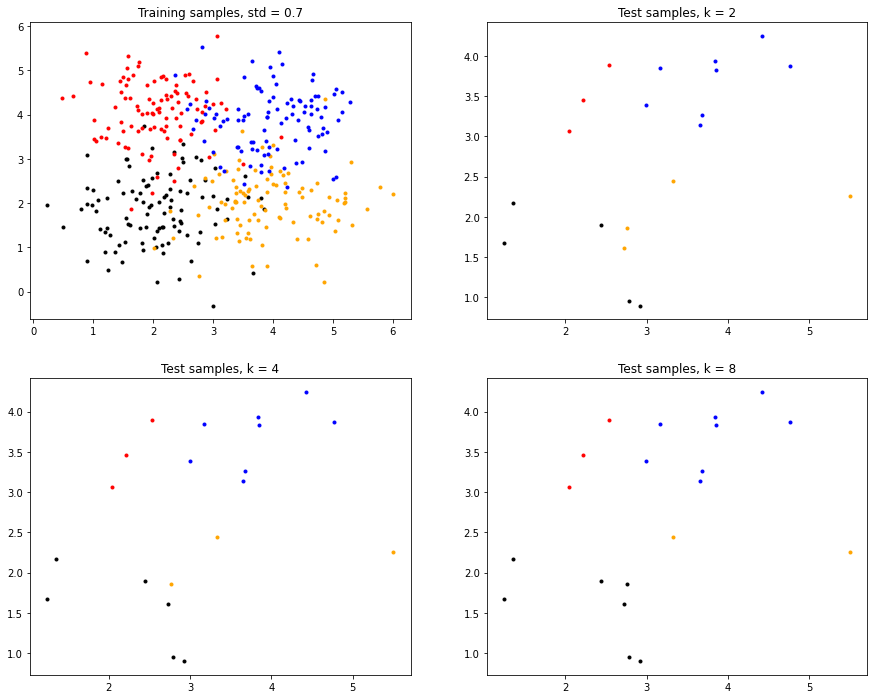

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [2]:
# Imports
import matplotlib.pyplot as plt
ks = [2, 4, 8]
stds = [0.3, 0.5, 0.7]
colors = ["black", "red", "orange", "blue"]

for std in stds:
    image_position = 1
    fig = plt.figure(figsize=(15, 12))
    # Generating four 2-dimensional normal distributions (to 'training')
    xc1 = np.random.normal(loc=[2.0, 2.0], scale=std, size=(100, 2))
    yc1 = np.zeros(100)
    xc2 = np.random.normal(loc=[2.0, 4.0], scale=std, size=(100, 2))
    yc2 = np.ones(100)
    xc3 = np.random.normal(loc=[4.0, 2.0], scale=std, size=(100, 2))
    yc3 = np.ones(100)*2
    xc4 = np.random.normal(loc=[4.0, 4.0], scale=std, size=(100, 2))
    yc4 = np.ones(100)*3

    # Generating test data
    X_test = np.random.normal(loc=[3.0, 3.0], scale=1, size=(20, 2))
    
    # Concatenating the four training distributions
    X_train = np.concatenate((xc1, xc2, xc3, xc4))
    y_train = np.concatenate((yc1, yc2, yc3, yc4))
    
    ax = fig.add_subplot(2, 2, image_position)
    for i in range(0, len(X_train)):
        ax.plot(X_train[i,0], X_train[i,1], '.', color=colors[int(y_train[i])] )
    ax.set_title('Training samples, std = ' + str(std))
    
    for k in ks:     
        # Aplying Knn:
        clf = Knn(k)
        clf.fit(X_train, y_train)
        result = clf.predict(X_test, "euclidean")

        # Plotting the result
        plt.figure()
        image_position += 1
        ax = fig.add_subplot(2, 2, image_position)
        for i in range(0, len(X_test)):
            ax.plot(X_test[i,0], X_test[i,1], '.', color=colors[int(result[i])] )
            ax.set_title('Test samples' + ", k = " + str(k))
            

# Conclusão

Com essa lista foi possível implementar, entender e aplicar os conceitos relativos ao algoritmo *Knn*. 

Ao se comparar todos os gráficos de teste com os das amostras de treinamento fica-se nítido como cada amostra é classificada de acordo com a classificação dos seus vizinhos mais próximos.     

Nos resultados pode-se observar diferentes classificações para uma amostra quando se varia o valor de K. O ajuste desse termo é importante para se realizar uma boa classificação, pois, por exemplo, com um K muito pequeno (como k=2 nos testes acima), se houver um *outlier* de outra classe próximo a amostra avaliada, pode ocorrer que já seja suficiente para uma classificação errada. Em contrapartida um K muito alto pode fazer com que as amostras absorvam a classificação de vizinhos distantes, o que também pode gerar classificações menos precisas.

Dessa forma pode-se infeir que é aconselhável rodar o algoritmo para diferente valores de K e observar qual funciona melhor para o problema. Para medir isso pode-se utilizar algumas medidas que permitem avaliar o desempenho de um classificador, como acurácia, matriz de confusão, curva ROC, etc.  

*Por fim, gostaria de destacar que apesar de nesse relatório ter-se utilizado o Knn para a classificação, o mesmo pode ser usado também em problemas de regressão. Nesse caso, normalmente a previsão é baseada na média ou na mediana das amostras mais semelhantes.*